In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2 as cv


In [2]:
def get_image_ready(filename, size_min=120, size_max=210, brightness_threshold=100):
    results = []
    results_detail = []
    img = cv.imread(filename)[:,:,1]
    img_blur = np.where(img > brightness_threshold, img, 0)
    edges = cv.Canny(img_blur, 50, 150)


    contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    img_canvas = 255*np.ones(img.shape).astype(np.uint8).copy()

    for contour in contours:
        epsilon = 0.05 * cv.arcLength(contour, True)
        approx = cv.approxPolyDP(contour, epsilon, True)
        
        # If the polygon has 4 vertices, it could be a square
        if len(approx) == 4:
            # Check if it's roughly a square
            # x, y, w, h = cv.boundingRect(approx)
            (x, y), (w, h), angle = cv.minAreaRect(approx)
            
            
            aspect_ratio = float(w) / h
            if 0.8 <= aspect_ratio <= 1.2:  # Square-like aspect ratio
                # Further checks on size and location of square
                
                if size_min <= w <= size_max and size_min <= h <= size_max and -30 <= angle <= 30:
                    # Draw the square or mark it as detected
                    # print(angle)
                    x = int(x)
                    y = int(y)
                    results.append([x, y])
                    results_detail.append([x, y, w, h, angle])

                    cv.drawContours(img_canvas , [approx], 0, (0, 0, 0), 3)

    results = np.array(results)
    results_detail = np.array(results_detail)
    plt.imshow(img_canvas)
    plt.show()
    plt.imshow(img)


    y_len, x_len = img.shape
    conversion_factor = 0.02907
    square_x, square_y = (-5500, -22265)

    rx = (results_detail[0][0] - x_len/2) * conversion_factor
    ry = - (results_detail[0][1] - y_len/2) * conversion_factor
    angle = results_detail[0][4]
    angle_radian = angle / 180.0 * np.pi 
    r = np.sqrt(rx ** 2 + ry ** 2)

    x_center = square_x - rx + ry * angle_radian 
    y_center = square_y - ry - rx * angle_radian

    return np.array([x_center, y_center, angle]), (img, img_canvas), results_detail



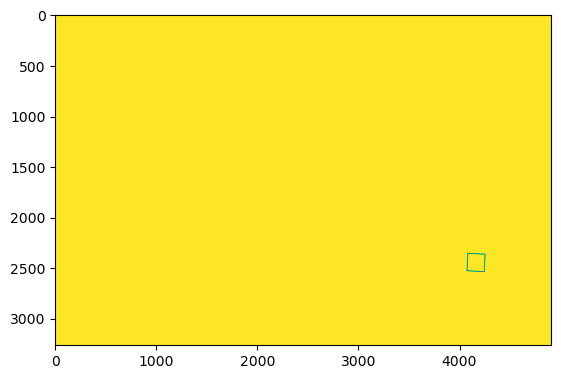

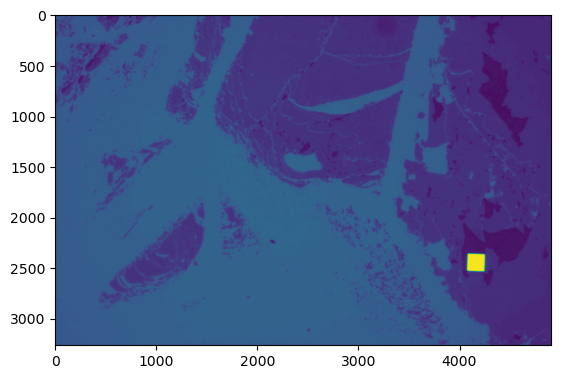

In [3]:
filename = '100x.jpg'
transform_params, _, _ = get_image_ready(filename=filename)